In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.interpolate

In [51]:
minimum_val = 2**-15.9
maximum_val = 2**24

minimum_10exp = np.log10(minimum_val)
maximum_10exp = np.log10(maximum_val)

minimum_exp = -15.9
maximum_exp = 24

def err(array_1,dtype1=np.float64,dtype2=np.float16):
    return array_1.astype(dtype1) - array_1.astype(dtype2)

def diff(array_1,array_2,dtype=np.float64):
    return array_1.astype(dtype) - array_2.astype(dtype)

def diff_err(array_1,array_2,dtype1=np.float64,dtype2=np.float16):
    return diff(array_1,array_2,dtype=dtype1) - diff(array_1,array_2,dtype=dtype2)

def dist(array_1,array_2,dtype=np.float64):
    return np.sqrt(np.sum(np.square(diff(array_1,array_2,dtype=dtype),dtype=dtype),dtype=dtype),dtype=dtype)

def dist_err(array_1,array_2,dtype1=np.float64,dtype2=np.float16):
    return dist(array_1,array_2,dtype=dtype1) - dist(array_1,array_2,dtype=dtype2)

In [3]:
particle_1_err = np.array([0,0,1])
particle_2_err = np.array([0,1,1],dtype=np.float64)/np.linalg.norm(np.array([0,1,1],dtype=np.float64)).astype(np.float32).astype(np.float64)
particle_3_err = (np.ones(3,dtype=np.float64)/np.linalg.norm(np.ones(3,dtype=np.float64))).astype(np.float32).astype(np.float64)

particle_3_differr = np.array([100,4,1],dtype=np.float64)/np.linalg.norm(np.array([10,4,1],dtype=np.float64)).astype(np.float32).astype(np.float64)

particle_control = np.array([0,0,0])

In [4]:
nums = 2**np.linspace(minimum_exp,maximum_exp,10000)

In [5]:
xs_1 = np.zeros_like(nums)
ys_1 = np.zeros_like(nums)
xs_2 = np.zeros_like(nums)
ys_2 = np.zeros_like(nums)
xs_3 = np.zeros_like(nums)
ys_3 = np.zeros_like(nums)
true_dists = np.zeros_like(nums)
xs_3diff = np.zeros_like(nums)
ys_3diff = np.zeros_like(nums)
for idx,num in enumerate(nums):

    true_dists[idx] = (dist(particle_1_err*num,particle_control))

    xs_1[idx] = (np.sum(np.abs(diff_err(particle_1_err*num,particle_control))))
    ys_1[idx] = (dist_err(particle_1_err*num,particle_control))

    xs_2[idx] = (np.sum(np.abs(diff_err(particle_2_err*num,particle_control))))
    ys_2[idx] = (dist_err(particle_2_err*num,particle_control))

    xs_3[idx] = (np.sum(np.abs(diff_err(particle_3_err*num,particle_control))))
    ys_3[idx] = (dist_err(particle_3_err*num,particle_control))

    xs_3diff[idx] = (np.sum(np.abs(diff_err(particle_3_differr*num,particle_control))))
    ys_3diff[idx] = (dist_err(particle_3_differr*num,particle_control))

/tmp/ipykernel_14902/1133362991.py:16: RuntimeWarning: overflow encountered in square
  return np.sqrt(np.sum(np.square(diff(array_1,array_2,dtype=dtype),dtype=dtype),dtype=dtype),dtype=dtype)
/home/hqureshi/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


/tmp/ipykernel_14902/615935299.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.scatter(nums,ys_3diff/nums - ys_3/nums,label="3 Diff Errors")


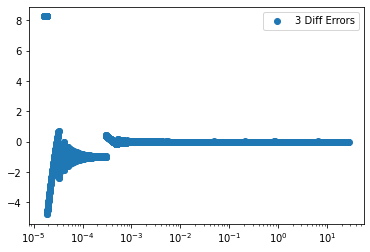

In [6]:
plt.scatter(nums,ys_3diff/nums - ys_3/nums,label="3 Diff Errors")
plt.xscale('log')
#plt.scatter(nums,ys_3/nums,label="3 Errors")
#plt.scatter(nums,ys_2/nums,label="2 Errors")
#plt.scatter(nums,ys_1/nums,label="1 Error")
plt.legend()
plt.show()

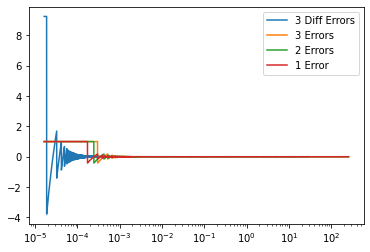

In [7]:
plt.plot(true_dists,ys_3diff/true_dists,label="3 Diff Errors")
plt.plot(true_dists,ys_3/true_dists,label="3 Errors")
plt.plot(true_dists,ys_2/true_dists,label="2 Errors")
plt.plot(true_dists,ys_1/true_dists,label="1 Error")

plt.xscale('log')
plt.legend()
plt.show()

In [73]:
nums = 10**np.linspace(-3.2,-1,100000)

xs_3 = np.zeros_like(nums)
ys_3 = np.zeros_like(nums)
true_dists = np.zeros_like(nums)
diff_errs = np.zeros_like(nums)
true_diffs = np.zeros_like(nums)

for idx,num in enumerate(nums):

    true_dists[idx] = (dist(particle_3_err*num,particle_control))

    xs_3[idx] = (np.sum(np.abs(diff_err(particle_3_err*num,particle_control))))
    ys_3[idx] = (dist_err(particle_3_err*num,particle_control))
    diff_errs[idx] = np.sum(diff_err(particle_3_err*num,particle_control))

    true_diffs[idx] = np.sum(np.abs(diff(particle_3_err*num,particle_control,dtype=np.float64)))

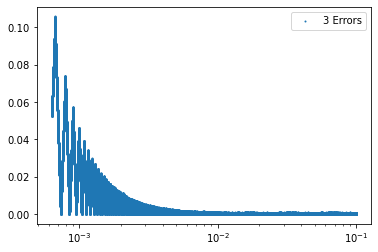

In [74]:
plt.scatter(true_dists,np.abs(ys_3/true_dists),label="3 Errors",s=1)

plt.xscale('log')
plt.legend()
plt.show()

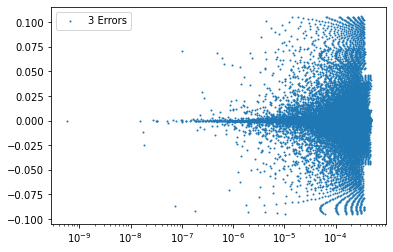

In [75]:
plt.scatter(err(nums)/nums,ys_3/true_dists,label="3 Errors",s=1)

plt.xscale('log')
plt.legend()
plt.show()

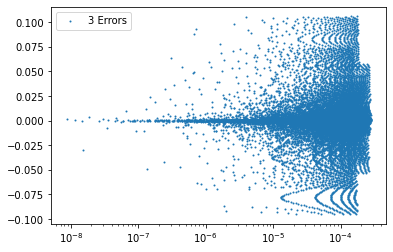

In [76]:
plt.scatter((diff_errs/3)/nums,ys_3/true_dists,label="3 Errors",s=1)

plt.xscale('log')
plt.legend()
plt.show()

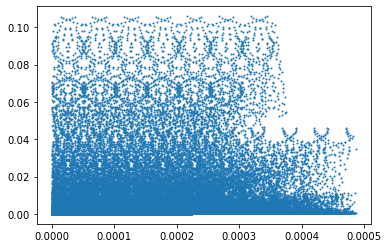

In [82]:
plt.scatter(np.abs(err(nums))/nums,np.abs(ys_3)/true_dists,s=1)
plt.show()

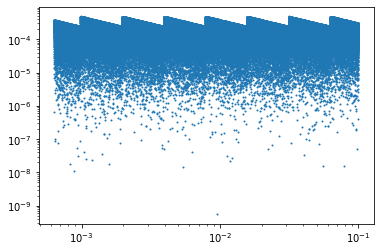

In [88]:
plt.scatter(nums,np.abs(err(nums))/nums,s=1)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [94]:
maximum_rel_err = np.max(np.abs(err(nums))/nums)
print(maximum_rel_err)

0.000486954761285917


In [56]:
nums2 = 10**np.linspace(minimum_10exp,maximum_10exp,100000)

diff_errs2 = np.zeros_like(nums)
diffs2 = np.zeros_like(nums)

for idx,num in enumerate(nums):

    #true_dists[idx] = (dist(particle_3_err*num,particle_control))

    #xs_3[idx] = (np.sum(np.abs(diff_err(particle_3_err*num,particle_control))))
    #ys_3[idx] = (dist_err(particle_3_err*num,particle_control))
    diff_errs2[idx] = np.sum(diff_err(particle_3_err*num,particle_control))
    diffs2[idx] = np.sum(np.abs(diff(particle_3_err*num,particle_control)))

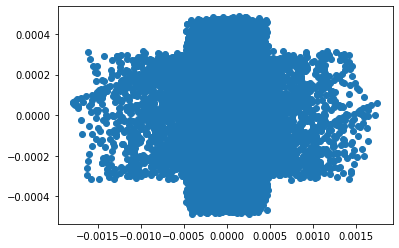

In [58]:
plt.scatter(err(nums2)/nums2,diff_errs2/diffs2)
plt.show()